# Thyroid Disease dataset

#### Dataset information

The original [thyroid disease](https://archive.ics.uci.edu/ml/datasets/Thyroid+Disease) (ann-thyroid) dataset from [UCI machine learning repository](https://archive.ics.uci.edu/ml/) is a classification dataset, which is suited for training ANNs. It has 3772 training instances and 3428 testing instances. It has 15 categorical and 6 real attributes. The problem is to determine whether a patient referred to the clinic is hypothyroid. Therefore three classes are built: normal (not hypothyroid), hyperfunction and subnormal functioning. For outlier detection, 3772 training instances are used, with only 6 real attributes. The hyperfunction class is treated as outlier class and other two classes are inliers, because hyperfunction is a clear minority class.

#### Source (citation)

F. Keller, E. Muller, K. Bohm.“[HiCS: High-contrast subspaces for density-based outlier ranking.](https://www.ipd.kit.edu/~muellere/publications/ICDE2012.pdf)” ICDE, 2012.

C. C. Aggarwal and S. Sathe, “[Theoretical foundations and algorithms for outlier ensembles.](http://www.kdd.org/exploration_files/Article4.pdf)” ACM SIGKDD Explorations Newsletter, vol. 17, no. 1, pp. 24–47, 2015.Downloads

Saket Sathe and Charu C. Aggarwal. [LODES: Local Density meets Spectral Outlier Detection.](http://saketsathe.net/papers/lodes.pdf) SIAM Conference on Data Mining, 2016.

#### Downloads

File: [thyroid.mat](https://www.dropbox.com/s/bih0e15a0fukftb/thyroid.mat?dl=0)

Description: X = Multi-dimensional point data, y = labels (1 = outliers, 0 = inliers)

## Load necessary libraries

We will use scipy to load .mat dataset in python

You can print dataset after loading to visualize all keys in it

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.io import loadmat

np.random.seed(41)

In [2]:
dataset = loadmat("./thyroid.mat")
X = dataset["X"]
y = dataset["y"]

X.shape, y.shape

((3772, 6), (3772, 1))

In [3]:
from collections import Counter

Counter(y.reshape(-1).tolist())

Counter({0.0: 3679, 1.0: 93})

## Build dataframe from the dataset (X, y)

In [4]:
train_df = pd.DataFrame(X, columns=[f"TyphoidFeat{i+1}" for i in range(X.shape[1])])
train_df["label"] = y.reshape(-1)

Print 5 inputs per group

In [5]:
train_df.groupby("label").sample(5)

,TyphoidFeat1,TyphoidFeat2,TyphoidFeat3,TyphoidFeat4,TyphoidFeat5,TyphoidFeat6,label
3580,0.569892,0.005094,0.175522,0.254673,0.375587,0.180328,0.0
156,0.548387,0.001698,0.251423,0.261682,0.525822,0.139344,0.0
2419,0.612903,0.001226,0.279886,0.210280,0.356808,0.147541,0.0
1693,0.182796,0.002264,0.175522,0.189252,0.417840,0.122951,0.0
626,0.591398,0.000755,0.213472,0.275701,0.394366,0.188525,0.0
2937,0.290323,0.194340,0.192600,0.147196,0.455399,0.088525,1.0
2728,0.000000,0.081132,0.086338,0.074182,0.394366,0.049984,1.0
3274,0.526882,0.109434,0.222960,0.053738,0.478873,0.029508,1.0
1836,0.634409,0.057547,0.090133,0.070093,0.206573,0.080328,1.0
2374,0.387097,0.103774,0.080645,0.100467,0.399061,0.067213,1.0


In [6]:
train_df.describe()

,TyphoidFeat1,TyphoidFeat2,TyphoidFeat3,TyphoidFeat4,TyphoidFeat5,TyphoidFeat6,label
count,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000
mean,0.543121,0.008983,0.186826,0.248332,0.376941,0.177301,0.024655
std,0.203790,0.043978,0.070405,0.080579,0.087382,0.054907,0.155093
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.376344,0.001132,0.156546,0.203271,0.328638,0.149180,0.000000
50%,0.569892,0.003019,0.190702,0.241822,0.375587,0.173770,0.000000
75%,0.709677,0.004528,0.213472,0.282710,0.413146,0.196721,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Feature corralation matrix

Some feature are higly correlated with the target value

In [7]:
train_df.corr().abs().style.background_gradient("Blues")

,TyphoidFeat1,TyphoidFeat2,TyphoidFeat3,TyphoidFeat4,TyphoidFeat5,TyphoidFeat6,label
TyphoidFeat1,1.000000,0.053253,0.226474,0.040146,0.170440,0.059247,0.013753
TyphoidFeat2,0.053253,1.000000,0.161426,0.261677,0.072012,0.286846,0.604791
TyphoidFeat3,0.226474,0.161426,1.000000,0.513076,0.392945,0.319112,0.225713
TyphoidFeat4,0.040146,0.261677,0.513076,1.000000,0.420842,0.771332,0.343590
TyphoidFeat5,0.170440,0.072012,0.392945,0.420842,1.000000,0.187793,0.038140
TyphoidFeat6,0.059247,0.286846,0.319112,0.771332,0.187793,1.000000,0.366111
label,0.013753,0.604791,0.225713,0.343590,0.038140,0.366111,1.000000


In [8]:
features = train_df.columns[:-1]

## Try visualizing for different functions
- $x => np.log(x)$
- $x => np.log(1 + x)$
- $x => x^{1/3}$
- $x => x^{1/4}$

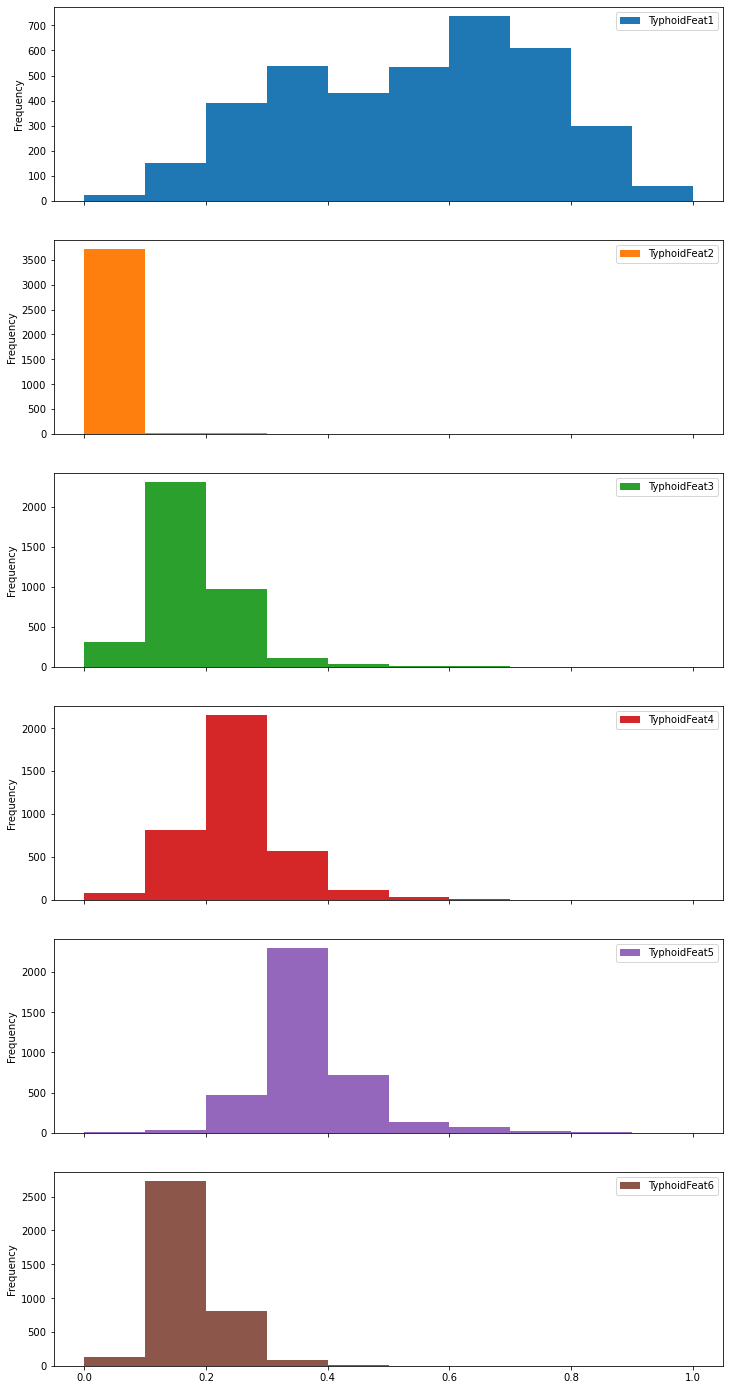

In [9]:
train_df[features].plot.hist(subplots=True, figsize=(12, 25))
plt.show()

Considered functions :
- $x_1 => x_1$
- $x_2 => np.log(x_2)$
- $x_3 => x_3^{1/4}$
- $x_4 => x_4^{1/4}$
- $x_5 => np.log(x_5 + 1)$
- $x_6 => x_6^{1/3}$

Plot of feature 2 after log

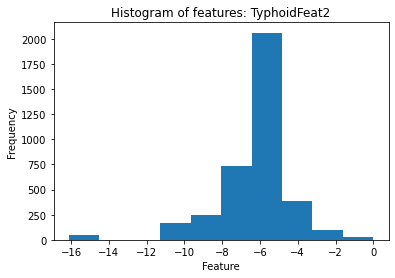

In [10]:
np.log(train_df[features[1]] + 1e-7).plot.hist()
plt.title('Histogram of features: '+features[1])
plt.xlabel('Feature')
plt.show()

In [11]:
train_df[features[0]] = train_df[features[0]]
train_df[features[1]] = np.log(train_df[features[1]] + 1e-7)
train_df[features[2]] = train_df[features[2]] ** (1/3)
train_df[features[3]] = train_df[features[3]] ** (1/4)
train_df[features[4]] = np.log(1 + train_df[features[4]])
train_df[features[5]] = train_df[features[5]] ** (1/3)

## Apply PCA to visualize outlier and inlier

Principal component analysis (PCA).

Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space. The input data is centered but not scaled for each feature before applying the SVD.

It uses the LAPACK implementation of the full SVD or a randomized truncated SVD by the method of Halko et al. 2009, depending on the shape of the input data and the number of components to extract.

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(train_df[features])

**explained_variance_** : **ndarray of shape (n_components,)** 

The amount of variance explained by each of the selected components. The variance estimation uses `n_samples` degrees of freedom.

Equal to n_components largest eigenvalues of the covariance matrix of X.

In [13]:
pca.explained_variance_

array([3.95285689, 0.04199122])

In [14]:
train_pca = pca.transform(train_df[features])
train_pca.shape, train_df.shape

((3772, 2), (3772, 7))

## Plot 100 sample per class

In [15]:
data = train_df.groupby("label").sample(90)
data.sample(10)

,TyphoidFeat1,TyphoidFeat2,TyphoidFeat3,TyphoidFeat4,TyphoidFeat5,TyphoidFeat6,label
2150,0.795699,-4.370762,0.577500,0.779477,0.391280,0.597316,0.0
289,0.720430,-3.014778,0.287320,0.310924,0.251836,0.209388,1.0
727,0.473118,-6.378179,0.559900,0.659569,0.203228,0.584804,0.0
1142,0.344086,-1.197703,0.287320,0.363835,0.332440,0.227051,1.0
3308,0.720430,-6.010472,0.606377,0.657524,0.291197,0.524466,0.0
519,0.731183,-3.228352,0.414388,0.587532,0.273497,0.459030,1.0
2515,0.612903,-3.382502,0.577500,0.626650,0.349135,0.464159,1.0
2374,0.387097,-2.265543,0.432042,0.562997,0.335801,0.406585,1.0
1275,0.290323,-1.338403,0.432042,0.530895,0.287682,0.396416,1.0
2661,0.774194,-5.742218,0.695765,0.716818,0.397610,0.530360,0.0


In [16]:
from matplotlib import pyplot as plt
import seaborn as sns

For good visualization, we will use only a subset of the data

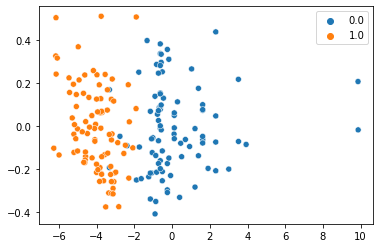

In [17]:
sns.scatterplot(x=train_pca[data.index][:, 0], y=train_pca[data.index][:, 1], hue=data.label.values)
plt.show()

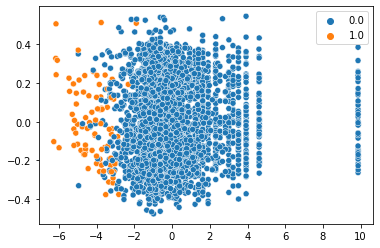

In [18]:
sns.scatterplot(x=train_pca[:, 0], y=train_pca[:, 1], hue=train_df.label.values)
plt.show()

Outlier are left aligned features in this visualization

## Split dataset into training and testing

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
train_df.groupby("label").sample(4)

,TyphoidFeat1,TyphoidFeat2,TyphoidFeat3,TyphoidFeat4,TyphoidFeat5,TyphoidFeat6,label
2615,0.225806,-4.550101,0.654125,0.729181,0.394450,0.545467,0.0
327,0.795699,-8.574932,0.559900,0.769417,0.255479,0.673071,0.0
1027,0.247312,-5.742218,0.606377,0.733659,0.294700,0.603381,0.0
1136,0.569892,-5.636272,0.527834,0.606731,0.195536,0.528410,0.0
2356,0.666667,-2.024381,0.441978,0.614429,0.384911,0.437267,1.0
2937,0.290323,-1.638148,0.577500,0.619404,0.375280,0.445678,1.0
1040,0.720430,-2.511676,0.287320,0.409199,0.332440,0.265916,1.0
1269,0.462366,-2.466213,0.504078,0.542237,0.375280,0.370405,1.0


In [21]:
train_df.describe()

,TyphoidFeat1,TyphoidFeat2,TyphoidFeat3,TyphoidFeat4,TyphoidFeat5,TyphoidFeat6,label
count,3772.000000,3.772000e+03,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000
mean,0.543121,-6.259120e+00,0.562237,0.698270,0.317930,0.555497,0.024655
std,0.203790,1.987708e+00,0.074936,0.062767,0.061670,0.060938,0.155093
min,0.000000,-1.611810e+01,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.376344,-6.783614e+00,0.538949,0.671458,0.284155,0.530360,0.000000
50%,0.569892,-5.802840e+00,0.575597,0.701251,0.318880,0.558031,0.000000
75%,0.709677,-5.397386e+00,0.597651,0.729181,0.345818,0.581590,0.000000
max,1.000000,1.000000e-07,1.000000,1.000000,0.693147,1.000000,1.000000


In [22]:
X_train, X_test, y_train, y_test = train_test_split(train_df[features], train_df["label"], stratify=train_df["label"], random_state=0, test_size=0.25)

X_train.shape, X_test.shape

((2829, 6), (943, 6))

In [23]:
y_train.value_counts()

0.0    2759
1.0      70
Name: label, dtype: int64

In [24]:
y_test.value_counts()

0.0    920
1.0     23
Name: label, dtype: int64

## Density estimation method

- Dentity on the all features
- Dentity on the selected features
- Dentity on PCA features

In [25]:
from typing import Tuple


def compute_mu_std(X_train: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    mu = np.mean(X_train, axis=0)
    var = np.cov(X_train, rowvar=0)
    return mu, var

def multivariate_gaussian(X: np.ndarray, mu: np.ndarray, var: np.ndarray):
    """
    Computes the probability 
    density function of the examples X under the multivariate gaussian 
    distribution with parameters mu and var. If var is a matrix, it is
    treated as the covariance matrix. If var is a vector, it is treated
    as the var values of the variances in each dimension (a diagonal
    covariance matrix
    """
    
    k = len(mu)
    
    if var.ndim == 1:
        var = np.diag(var)
        
    X = X - mu
    p = (2* np.pi)**(-k/2) * np.linalg.det(var)**(-0.5) * \
        np.exp(-0.5 * np.sum(np.matmul(X, np.linalg.pinv(var)) * X, axis=1))
    
    return p

In [26]:
mu, var = compute_mu_std(X_train.values)

mu.shape, var.shape

((6,), (6, 6))

In [27]:
density = multivariate_gaussian(X_test.values, mu, var)
density.shape

(943,)

In [28]:
train_density = multivariate_gaussian(X_train.values, mu, var)
train_density.shape

(2829,)

## Threshold selection criteria

In [29]:
from sklearn.metrics import f1_score

def compute_score(y_val, y_pred):
    """
        tp = np.mean(preds & (y_val==1))
        fp = np.mean(preds & (y_val==0))
        tn = np.mean(~preds & (y_val==0))
        fn = np.mean(~preds & (y_val==1))
        
        prec = tp / (tp + fp + 1e-10)
        rec = tp / (tp + fn + 1e-10)
        F1 = 2 * prec * rec / (prec + rec + 1e-10)
    """
    return f1_score(y_val, y_pred)

In [30]:
def select_threshold(y_val, p_val): 
    """
    Finds the best threshold to use for selecting outliers 
    based on the results from a validation set (p_val) 
    and the ground truth (y_val)
    
    Args:
        y_val (ndarray): Ground truth on validation set
        p_val (ndarray): Results on validation set
        
    Returns:
        epsilon (float): Threshold chosen 
        F1 (float):      F1 score by choosing epsilon as threshold
    """ 

    best_epsilon = 0
    best_F1 = 0
    F1 = 0
    
    step_size = (max(p_val) - min(p_val)) / 1000

    accs = 0
    
    for epsilon in np.arange(min(p_val), max(p_val), step_size):
        preds = p_val < epsilon
        
        F1 = compute_score(y_val, preds)

        acc = np.mean(preds == y_val)
        
        if F1 > best_F1:
            best_F1 = F1
            best_epsilon = epsilon
            accs = acc
        
    return best_epsilon, best_F1, accs

In [31]:
epsilon, score, accuracy = select_threshold(y_train.values, train_density)

print("The optimal  threshold is:", epsilon)
print("The optimal f1_score is:", score)
print("The accuracy is:", accuracy)

The optimal  threshold is: 20.208023146990886
The optimal f1_score is: 0.2702702702702703
The accuracy is: 0.9141039236479321


We will use the computed value of epsilon to determine anomaly in test set

In [32]:
test_score = compute_score(y_test.values, density < epsilon)

test_score

0.35185185185185186

## Select features before estimation

In [33]:
y_train.head()

780     0.0
519     1.0
1047    0.0
2693    0.0
323     0.0
Name: label, dtype: float64

In [34]:
X_train.head()

,TyphoidFeat1,TyphoidFeat2,TyphoidFeat3,TyphoidFeat4,TyphoidFeat5,TyphoidFeat6
780,0.451613,-6.378179,0.631154,0.707107,0.355736,0.541769
519,0.731183,-3.228352,0.414388,0.587532,0.273497,0.459030
1047,0.301075,-7.658959,0.463571,0.566242,0.318880,0.550922
2693,0.774194,-4.861877,0.588662,0.760279,0.431721,0.558031
323,0.333333,-5.636272,0.575597,0.710681,0.318880,0.565084


In [35]:
data = X_train.copy()
data["Label"] = y_train

data.describe()

,TyphoidFeat1,TyphoidFeat2,TyphoidFeat3,TyphoidFeat4,TyphoidFeat5,TyphoidFeat6,Label
count,2829.000000,2.829000e+03,2829.000000,2829.000000,2829.000000,2829.000000,2829.000000
mean,0.541935,-6.263105e+00,0.563220,0.698927,0.318790,0.555694,0.024744
std,0.205771,2.003897e+00,0.075243,0.061935,0.061791,0.060609,0.155371
min,0.000000,-1.611810e+01,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.365591,-6.783614e+00,0.538949,0.671458,0.284155,0.530360,0.000000
50%,0.569892,-5.802840e+00,0.575597,0.702097,0.318880,0.558031,0.000000
75%,0.709677,-5.397386e+00,0.597651,0.729181,0.345818,0.581590,0.000000
max,1.000000,1.000000e-07,1.000000,1.000000,0.693147,1.000000,1.000000


In [36]:
data.corr().abs().style.background_gradient("Blues")

,TyphoidFeat1,TyphoidFeat2,TyphoidFeat3,TyphoidFeat4,TyphoidFeat5,TyphoidFeat6,Label
TyphoidFeat1,1.000000,0.060192,0.257267,0.015998,0.173923,0.075931,0.009633
TyphoidFeat2,0.060192,1.000000,0.251647,0.403963,0.042408,0.452567,0.320276
TyphoidFeat3,0.257267,0.251647,1.000000,0.506658,0.386257,0.311020,0.281814
TyphoidFeat4,0.015998,0.403963,0.506658,1.000000,0.349081,0.840468,0.520675
TyphoidFeat5,0.173923,0.042408,0.386257,0.349081,1.000000,0.192397,0.045429
TyphoidFeat6,0.075931,0.452567,0.311020,0.840468,0.192397,1.000000,0.539322
Label,0.009633,0.320276,0.281814,0.520675,0.045429,0.539322,1.000000


features 6 and 4 are highly correlated, keeps 6 due to it high correlation with Label

Very low correlation between features 1, 5 and Label. We will remove it 

In [37]:
X_train_selected = X_train.drop(columns=[features[0], features[3], features[4]])
X_test_selected = X_test.drop(columns=[features[0], features[3], features[4]])


X_train_selected.shape, X_test_selected.shape

((2829, 3), (943, 3))

In [38]:
mu, var = compute_mu_std(X_train_selected.values)

train_density = multivariate_gaussian(X_train_selected.values, mu, var)
test_density = multivariate_gaussian(X_test_selected.values, mu, var)

In [39]:
epsilon, score, accuracy = select_threshold(y_train.values, train_density)

print("The optimal  threshold is:", epsilon)
print("The optimal f1_score is:", score)
print("The accuracy is:", accuracy)

The optimal  threshold is: 0.07412489565666351
The optimal f1_score is: 0.33469387755102037
The accuracy is: 0.9423824673029338


In [40]:
test_score = compute_score(y_test.values, test_density < epsilon)

print("F1-score when selecting features:", test_score)

F1-score when selecting features: 0.4594594594594595


## Compare Features selections with PCA 3 components

In [41]:
pca = PCA(n_components=3)

X_train_selected = pca.fit_transform(X_train)
X_test_selected = pca.transform(X_test)


X_train_selected.shape, X_test_selected.shape

((2829, 3), (943, 3))

In [42]:
mu, var = compute_mu_std(X_train_selected)

train_density = multivariate_gaussian(X_train_selected, mu, var)
test_density = multivariate_gaussian(X_test_selected, mu, var)

In [43]:
epsilon, score, accuracy = select_threshold(y_train.values, train_density)

print("The optimal  threshold is:", epsilon)
print("The optimal f1_score is:", score)
print("The accuracy is:", accuracy)

The optimal  threshold is: 0.008643553167393136
The optimal f1_score is: 0.3867403314917127
The accuracy is: 0.9607635206786851


In [44]:
test_score = compute_score(y_test.values, test_density < epsilon)

print("F1-score when selecting features:", test_score)

F1-score when selecting features: 0.5161290322580646


## LOF implementation of sklearn

In [45]:
from sklearn.neighbors import LocalOutlierFactor

In [46]:
def fit_find_predict(model, X_train, y_train, X_test, y_test):
    """
    Fit a model to the data and return the predictions
    """
    model.fit(X_train.values)
    train_density = model.predict(X_train.values)
    test_density = model.predict(X_test.values)

    epsilon, score, accuracy = select_threshold(y_train.values, train_density)

    print("The optimal  threshold is:", epsilon)
    print("The optimal f1_score is:", score)
    print("The accuracy is:", accuracy)

    test_score = compute_score(y_test.values, test_density < epsilon)
    print("F1-score when selecting features:", test_score)

In [47]:
fit_find_predict(
    LocalOutlierFactor(novelty=True, n_neighbors=100),
    X_train, y_train, X_test, y_test
)

The optimal  threshold is: -0.998
The optimal f1_score is: 0.2222222222222222
The accuracy is: 0.9554612937433722
F1-score when selecting features: 0.19230769230769232


In [48]:
from sklearn.svm import OneClassSVM

In [49]:
fit_find_predict(
    OneClassSVM(),
    X_train, y_train, X_test, y_test
)

The optimal  threshold is: -0.998
The optimal f1_score is: 0.09427609427609428
The accuracy is: 0.5245669848002827
F1-score when selecting features: 0.09001956947162425


In [50]:
from sklearn.ensemble import IsolationForest

In [51]:
fit_find_predict(
    IsolationForest(random_state=41),
    X_train, y_train, X_test, y_test
)

The optimal  threshold is: -0.998
The optimal f1_score is: 0.31313131313131315
The accuracy is: 0.903852951572994
F1-score when selecting features: 0.35384615384615387


## Classification approach

In [52]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [53]:
logistic = LogisticRegression().fit(X_train, y_train)

In [54]:
preds = logistic.predict(X_test)

compute_score(y_test.values, preds)

0.6976744186046512

In [55]:
xgb = XGBClassifier().fit(X_train, y_train)

In [56]:
preds = xgb.predict(X_test)

compute_score(y_test.values, preds)

0.9166666666666666

XGBoost is all you need, bye :-)